In [1]:
# 如果不想要每次在jupyter notebook顯示都寫.show()可以加上%matplotlib inline
%matplotlib inline


# PCA example with Iris Data-set


Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.




In [2]:
print(__doc__)

# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

Automatically created module for IPython interactive environment


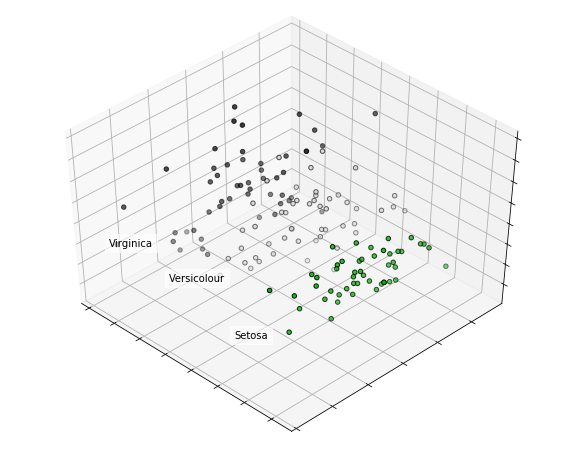

In [45]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target


fig = plt.figure(1, figsize=(8, 6))
# Clear current figure
plt.clf()
# elev: elevation angle
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=45, azim=135)
# Clear current axes
plt.cla()

# The actual PCA operation
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# plot the label (while not overlapping the data points)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=0.6, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()